# Flower Recognition with ResNet

In [2]:
!pip install torch torchvision pandas numpy matplotlib scikit-learn pillow scipy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import torch.nn.functional as F

import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

from sklearn.metrics import confusion_matrix, classification_report
import scipy
from PIL import Image
import os
import shutil
import time
from tempfile import TemporaryDirectory
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Using device: cpu


Analyzing training logs for all models...


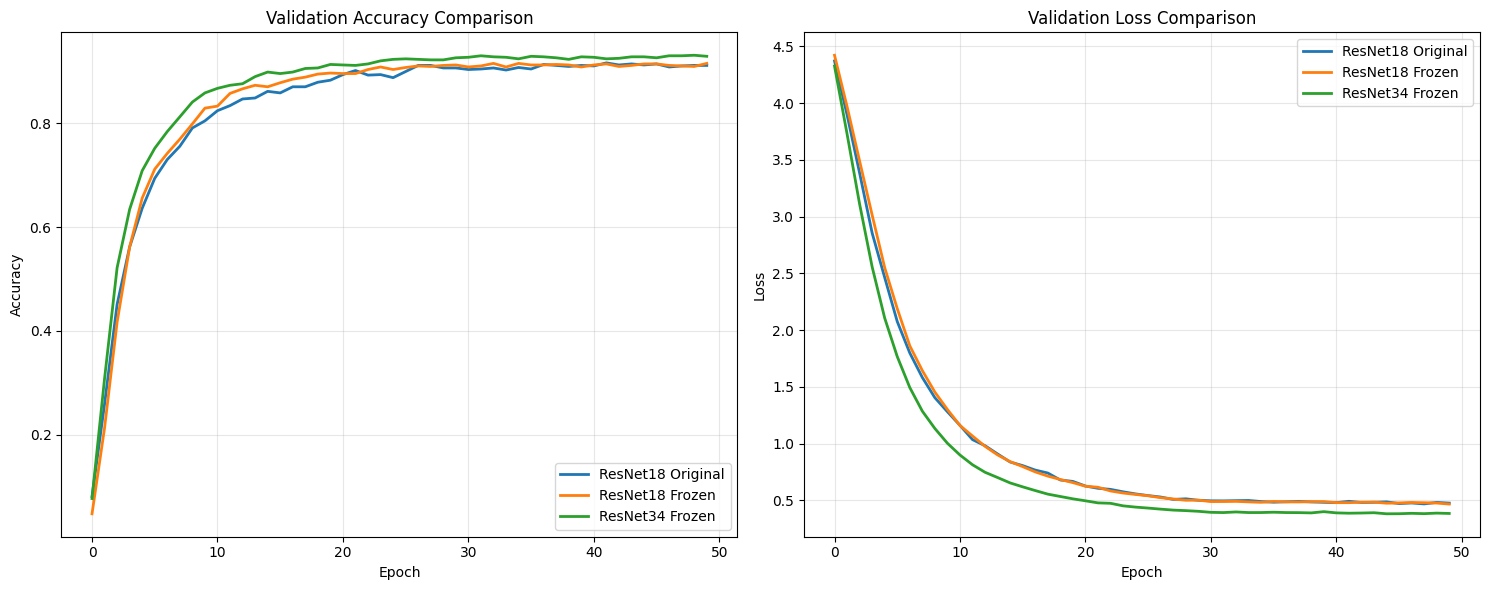


=== Model Performance Summary ===

Best Validation Accuracies:
ResNet18 Original: 0.9167
ResNet18 Frozen: 0.9157
ResNet34 Frozen: 0.9314

Final Validation Accuracies:
ResNet18 Original: 0.9118
ResNet18 Frozen: 0.9157
ResNet34 Frozen: 0.9294

Best performing model: ResNet34 Frozen (Best Val Acc: 0.9314)


In [5]:
# Compare all experiments
def compare_experiments():
    experiments = {
        'ResNet18 Original': './ResNet18_Standard/resnet18_original.txt',
        'ResNet18 Frozen': './ResNet18_Frozen/resnet18_frozen.txt',
        'ResNet34 Frozen': './ResNet34_Frozen/resnet34_frozen.txt',
    }
    
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 2, 1)
    best_val_acc = {}  
    final_val_acc = {} 
    
    for exp_name, file_path in experiments.items():
        try:
            data = pd.read_csv(file_path)
            plt.plot(data['Val_Acc'], label=exp_name, linewidth=2)
            
            best_val_acc[exp_name] = data['Val_Acc'].max()
            final_val_acc[exp_name] = data['Val_Acc'].iloc[-1]
            
        except FileNotFoundError:
            print(f"File {file_path} not found")
            continue
    
    plt.title('Validation Accuracy Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot validation loss comparison
    plt.subplot(1, 2, 2)
    for exp_name, file_path in experiments.items():
        try:
            data = pd.read_csv(file_path)
            plt.plot(data['Val_Loss'], label=exp_name, linewidth=2)
        except FileNotFoundError:
            continue
    
    plt.title('Validation Loss Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('all_experiments_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print performance summary
    print("\n=== Model Performance Summary ===")
    print("\nBest Validation Accuracies:")
    for model, acc in best_val_acc.items():
        print(f"{model}: {acc:.4f}")
        
    print("\nFinal Validation Accuracies:")
    for model, acc in final_val_acc.items():
        print(f"{model}: {acc:.4f}")
    
    best_model = max(best_val_acc.items(), key=lambda x: x[1])
    print(f"\nBest performing model: {best_model[0]} (Best Val Acc: {best_model[1]:.4f})")

print("Analyzing training logs for all models...")
compare_experiments()